<p>Nama  : Yusdiansya Putra</p>
<p>NIM   : 09011381823078</p>
<p>Kelas : SK5A</p>

### Ujian Akhir Semester Kecerdesan Buatan
<p>Kasus : Prediksi risiko kanker payudara (Breast Cancer)</p>
<p>Metode : Support Vector Machine</p>


### Pre-Processing the Data

Data processing adalah langkah penting untuk masalah analisis. Seringkali merupakan ide yang sangat baik untuk menyiapkan data dalam mengekspos struktur masalah ke algoritme pembelajaran mesin dengan melibatkan sejumlah aktivitas seperti:
* Menetapkan nilai numerik ke data kategori; dimana nilai numerik adalah tipe data yang digunakan pada variabel atau konstanta untuk menyimpan nilai dalam bentuk bilangan atau angka baik angka atau bilangan tersebut adalah bilangan bulat atau bilangan real. Data kategori adalah data dimana variabel-variabelnya dikelompokkan menjadi beberapa kelompok.
* Menangani nilai yang hilang (Missing Data) dapat diartikan sebagai data atau informasi yang “hilang” atau tidak tersedia mengenai subjek penelitian pada variabel tertentu akibat faktor non sampling error. ; dan
* Normalisasi fitur adalah membuat fitur yang berbeda dalam skala yang sama.

### Tujuan:
Menemukan fitur paling prediktif dari data dan filter sehingga akan meningkatkan prediksi model analitik. Model analitik adalah model yang penyelesaiannya dilakukan teknik analitis artinya dilakukan dengan teknik-teknik matematika.


### Import Library

<p>Matplotlib.pyplot adalah kumpulan fungsi yang membuat beberapa perubahan pada gambar: misalnya, membuat gambar, membuat area plot dalam gambar, menambah label di plot dan lainnya.</p>

<p>Pandas adalah librari analisis data yang memiliki struktur data yang diperlukan untuk membersihkan data mentah ke dalam sebuah bentuk yang cocok untuk analisis (yaitu tabel). Pandas melakukan tugas penting seperti menyelaraskan data untuk perbandingan dan penggabungan set data, penanganan data yang hilang, dll, itu telah menjadi sebuah librari de facto untuk pemrosesan data tingkat tinggi dalam Python (yaitu statistik).

<p>Scipy.stats Sebagai turunan dari kelas rv_continuous, objek norm mewarisi kumpulan metode umum dan melengkapinya dengan detail spesifik untuk distribusi khusus.
    
<p>Seaborn merupakan pustaka visualisasi data pada lingkungan Python ber- sifat sumber terbuka yang berlisensi BSD dan dibangun di atas pustaka matplotlib. Seaborn akan mempermudah kita sebagai analis data untuk memproduksi visualisasi yang indah tanpa kostumisasi rumit seperti yang kita hadapi pada matplotlib.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")


plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'

data = pd.read_csv('C:/Users/asus/Desktop/SK5A/KECERDASAN BUATAN SK5A/Tugas UAS/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
#data.head()

### Label Encoding
Label encoding mengacu pada pengubahan label menjadi bentuk numerik untuk mengubahnya menjadi bentuk yang dapat dibaca mesin. Algoritme pembelajaran mesin kemudian dapat memutuskan dengan cara yang lebih baik tentang bagaimana label tersebut harus dioperasikan. Ini adalah langkah pra-pemrosesan yang penting untuk kumpulan data terstruktur dalam pembelajaran yang diawasi.
Menetapkan 30 fitur ke array NumPy X, dan mengubah label kelas dari representasi string aslinya (M dan B) menjadi bilangan bulat.

In [3]:
#Menetapkan prediktor ke variabel berjenis array (matriks)
array = data.values
X = array[:,1:31]
y = array[:,0]

<p>from sklearn.preprocessing import LabelEncoder</p>
Label encode target dengan nilai antara 0 dan n_classes-1.
Transformator ini harus digunakan untuk menentukan nilai target, yaitu y, dan bukan input X.

In [4]:
#transform label kelas dari representasi string aslinya (M dan B) menjadi bilangan bulat
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Panggil metode transformasi LabelEncorder pada dua variabel tiruan
# le.transform (['M', 'B'])

Setelah mengkodekan label kelas (diagnosis) dalam larik y, tumor ganas sekarang direpresentasikan sebagai kelas 1 (yaitu kehadiran sel kanker) dan tumor jinak direpresentasikan sebagai kelas 0 (yaitu tidak ada deteksi sel kanker), masing-masing *, diilustrasikan dengan memanggil metode transformasi LabelEncorder pada dua variabel dummy.


### Menilai Akurasi Model: Pisahkan data menjadi set pelatihan dan pengujian

Metode paling sederhana untuk mengevaluasi performa algoritme pembelajaran mesin adalah dengan menggunakan kumpulan data pelatihan dan pengujian yang berbeda. Di sini saya akan
* Bagi data yang tersedia menjadi satu set pelatihan dan satu set pengujian. (70% pelatihan, tes 30%)
* Latih algoritme di bagian pertama,
* membuat prediksi pada bagian kedua dan
* mengevaluasi prediksi terhadap hasil yang diharapkan.

Ukuran pemisahan dapat bergantung pada ukuran dan spesifikasi set data Anda, meskipun umumnya menggunakan 67% data untuk pelatihan dan 33% sisanya untuk pengujian.


In [5]:
#Pisahkan array atau matriks menjadi rangkaian acak dan subset pengujian
from sklearn.model_selection import train_test_split

##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

### Standardisasi Fitur

Standarisasi adalah teknik yang berguna untuk mengubah atribut dengan distribusi Gaussian dan cara yang berbeda serta deviasi standar ke distribusi Gaussian standar dengan rata-rata 0 dan simpangan baku 1.

Mari kita evaluasi algoritme yang sama dengan salinan standar set data. Di sini,dengah menggunakan sklearn untuk menskalakan dan mengubah data sedemikian rupa sehingga setiap atribut memiliki nilai rata-rata nol dan deviasi standar satu

In [6]:
from sklearn.preprocessing import StandardScaler

# Normalisasikan data (pusatkan sekitar 0 dan skala untuk menghilangkan varians).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

### Dekomposisi fitur menggunakan Principal Component Analysis (PCA)

<p>Dekomposisi adalah proses perubahan menjadi bentuk yang lebih sederhana.</p>
<p>Dari plot banyak pasangan fitur membagi data dengan baik ke tingkat yang sama, oleh karena itu dengan menggunakan salah satu metode reduksi dimensi untuk mencoba menggunakan fitur sebanyak mungkin dan mempertahankan informasi sebanyak mungkin ketika bekerja hanya dengan 2 dimensi. Saya akan menggunakan PCA</p>
<p>(PCA) bertujuan menerangkan struktur varians-kovarians melalui kombinasi linear dari variabel-variabel. Fungsi dari principal component analysis (PCA) adalah dengan merangkum banyak variabel bebas (X) yang memiliki indikasi saling berkorelasi ataupun saling mempengaruhi menjadi satu atau lebih variabel baru yang memuat kombinasi dari variabel-variabel bebas (X) sebelumnya, yang akan memungkinkan menghilangkan masalah multikolinearitas ketika dibentuk suatu model regresi (regresi komponen utama).</p>

In [7]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)

# summarize components
#print("Explained Variance: %s") % fit.explained_variance_ratio_
#print(fit.components_)

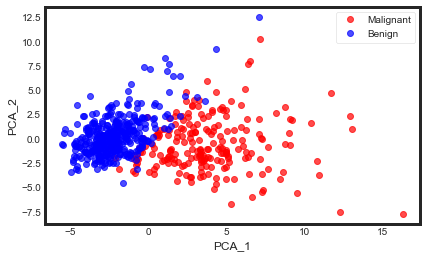

In [8]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][data.diagnosis == 'M'],PCA_df['PCA_2'][data.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][data.diagnosis == 'B'],PCA_df['PCA_2'][data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

* Sekarang, apa yang kami dapatkan setelah menerapkan transformasi PCA linier adalah subruang berdimensi lebih rendah (dari 3D ke 2D dalam kasus ini), di mana sampelnya "paling tersebar" di sepanjang sumbu fitur baru.



In [9]:
# Jumlah varian yang dijelaskan setiap PCa
var= pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)

###  Memutuskan Berapa Banyak Komponen Utama yang Akan Dipertahankan

Untuk menentukan berapa banyak komponen utama yang harus dipertahankan, hasil analisis komponen utama diringkas dengan membuat plot screen.

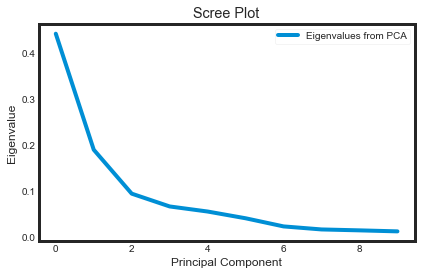

In [10]:
# Jumlah varian yang dijelaskan setiap PC
var= pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)

plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

#### Pengamatan
Perubahan kemiringan yang paling nyata pada plot scree terjadi pada komponen 2, yang merupakan “siku” dari plot scree. Oleh karena itu, dapat diperdebatkan berdasarkan plot scree bahwa tiga komponen pertama harus dipertahankan.

### Model prediksi menggunakan Support Vector Machine (SVM)

Algoritma pembelajaran Support Vector Machines (SVMs) akan digunakan untuk membangun model prediktif. SVM adalah salah satu algoritme klasifikasi yang paling populer, dan memiliki cara elegan untuk mengubah data nonlinier sehingga seseorang dapat menggunakan algoritme linier untuk menyesuaikan model linier dengan data (Cortes dan Vapnik 1995)

Mesin vektor dukungan yang dikernel adalah model yang kuat dan bekerja dengan baik pada berbagai kumpulan data.
1. SVM memungkinkan adanya batasan keputusan yang kompleks, meskipun datanya hanya memiliki sedikit fitur.
2. Mereka bekerja dengan baik pada data berdimensi rendah dan berdimensi tinggi (yaitu, sedikit dan banyak fitur), tetapi tidak diskalakan dengan baik dengan jumlah sampel.
> ** Menjalankan SVM pada data dengan hingga 10.000 sampel mungkin berfungsi dengan baik, tetapi bekerja dengan set data berukuran 100.000 atau lebih dapat menjadi tantangan dalam hal waktu proses dan penggunaan memori. **

3. SVM membutuhkan pemrosesan awal data yang cermat dan penyetelan parameter. Inilah sebabnya, akhir-akhir ini, kebanyakan orang menggunakan model berbasis pohon seperti random forest atau peningkatan gradien (yang memerlukan sedikit atau tanpa pemrosesan awal) di banyak aplikasi.
4. Model SVM sulit untuk diperiksa; sulit untuk memahami mengapa prediksi tertentu dibuat, dan mungkin sulit untuk menjelaskan model kepada seorang yang tidak ahli.

### Parameter
Parameter dalam SVM kernel adalah
* Regularisasi parameter C,
* Pilihan kernel, (linear, radial basis function (RBF) atau polynomial)
* Parameter khusus kernel.

gamma dan C keduanya mengontrol kompleksitas model, dengan nilai-nilai besar yang menghasilkan model yang lebih kompleks. Oleh karena itu, pengaturan yang baik untuk kedua parameter biasanya berkorelasi kuat, dan C serta gamma harus disesuaikan bersama.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'



* Supervised learning adalah ditandai dengan label dimana memiliki data yang lebih terstruktur. Pada Supervised learning terdiri dari classification dan regression.


In [13]:
data = pd.read_csv('C:/Users/asus/Desktop/SK5A/KECERDASAN BUATAN SK5A/Tugas UAS/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
#data.head()

In [14]:
#Assign predictors to a variable of ndarray (matrix) type
array = data.values
X = array[:,1:31] # features
y = array[:,0]

#transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

### Klasifikasi dengan validasi silang

Memisahkan data menjadi set pengujian dan pelatihan sangat penting untuk menghindari overfitting. Hal ini memungkinkan generalisasi data nyata yang sebelumnya tidak terlihat. Validasi silang memperluas gagasan ini lebih jauh. Alih-alih memiliki pemisahan jalur / pengujian tunggal, kami menentukan ** yang disebut lipatan ** sehingga datanya dibagi menjadi lipatan yang berukuran serupa.

* Pelatihan terjadi dengan mengambil semua lipatan kecuali satu - disebut sebagai sampel pisahan.
* Setelah menyelesaikan pelatihan, Anda menguji performa model yang dipasang menggunakan sampel pisahan.

* Sampel pisahan kemudian dibuang kembali dengan sisa lipatan lainnya, dan lipatan lain ditarik keluar sebagai sampel pisahan baru.

* Pelatihan diulangi lagi dengan sisa lipatan dan kami mengukur kinerja menggunakan sampel pisahan. Proses ini diulangi sampai setiap lipatan memiliki kesempatan untuk menjadi sampel pengujian atau pisahan.

* Performa pengklasifikasi yang diharapkan, yang disebut error validasi silang, selanjutnya hanyalah rata-rata tingkat error yang dihitung pada setiap sampel pisahan.

Proses ini didemonstrasikan dengan terlebih dahulu melakukan latihan standar / test split, dan kemudian menghitung kesalahan validasi silang.

In [15]:
# set pelatihan(Train) dan pengujian(Test).
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=2, stratify=y)

# Buat pengklasifikasi SVM dan latih pada 70% kumpulan data.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

 # Analisis keakuratan prediksi pada 30%.
classifier_score = clf.score(X_test, y_test)
print('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))


The classifier accuracy score is 0.95



C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Untuk mendapatkan ukuran akurasi prediksi yang lebih baik (yang dapat Anda gunakan sebagai proxy untuk "kesesuaian" model), Anda dapat membagi data secara berturut-turut menjadi beberapa bagian yang akan Anda gunakan untuk pelatihan dan pengujian:

In [16]:
# Mendapatkan rata-rata skor validasi silang 3 kali lipat menggunakan SVC(support vector classification).
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))


The 3-fold cross-validation accuracy score for this classifier is 0.97



C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Evaluasi di atas didasarkan pada penggunaan seluruh rangkaian fitur. Anda sekarang akan menggunakan strategi pemilihan fitur berbasis korelasi untuk menilai pengaruh penggunaan 3 fitur yang memiliki korelasi terbaik dengan label kelas.

In [17]:
from sklearn.feature_selection import SelectKBest, f_regression
clf2 = make_pipeline(SelectKBest(f_regression, k=3),SVC(probability=True))

scores = cross_val_score(clf2, Xs, y, cv=3)

# Mendapatkan rata-rata skor validasi silang 3 kali lipat menggunakan SVC(support vector classification)
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))


The 3-fold cross-validation accuracy score for this classifier is 0.97



C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

In [18]:
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and uncertainty: (%.2f +- %.3f)%%"%avg)

Average score and uncertainty: (94.20 +- 0.496)%


Dari hasil di atas, Anda dapat melihat bahwa hanya sebagian kecil fitur yang diperlukan untuk membuat model yang memiliki performa serupa dengan model berdasarkan penggunaan seluruh rangkaian fitur.
Pemilihan fitur adalah bagian penting dari proses pembuatan model yang harus selalu Anda perhatikan. Detailnya berada di luar cakupan notebook ini. Di sisa analisis, Anda akan terus menggunakan seluruh rangkaian fitur.

### Akurasi Model: Kurva Receiver Operating Characteristic (ROC)

Dalam pemodelan statistik dan pembelajaran mesin, ukuran kinerja akurasi model yang sering dilaporkan untuk masalah klasifikasi biner adalah Area Under the Curve (AUC).

Untuk memahami informasi yang disampaikan oleh kurva KOP, pertimbangkan apa yang disebut matriks konfusi yang pada dasarnya adalah tabel dua dimensi di mana model pengklasifikasi berada pada satu sumbu (vertikal), dan kebenaran dasar berada pada sumbu (horizontal) lainnya, seperti yang ditunjukkan di bawah. Salah satu sumbu ini dapat mengambil dua nilai (seperti yang digambarkan)

 Model says "+" |Model says  "-" 
--- | --- | ---
`True positive` | `False negative` | ** Actual: "+" **
 `False positive`  | `True negative` |  Actual: "-"
 Dalam kurva KOP, Anda memplot "Rasio True positif" pada sumbu Y dan "Rasio True positif" pada sumbu X, di mana nilai "True Positif", "False Negatif", "False Positif", dan "True Positif” adalah peristiwa (atau probabilitasnya) seperti dijelaskan di atas. Tarif ditentukan menurut berikut ini:
> * True positive rate (or sensitivity)}: tpr = tp / (tp + fn)
> * False positive rate:       fpr = fp / (fp + tn)
> * True negative rate (or specificity): tnr = tn / (fp + tn)

Dalam semua definisi, penyebut adalah margin baris dalam matriks konfusi di atas. Dengan demikian, seseorang bisa berekspresi
* rasio positif benar (tpr) sebagai probabilitas bahwa model mengatakan "+" ketika nilai sebenarnya adalah "+" (yaitu, probabilitas bersyarat). Namun, ini tidak memberi tahu Anda seberapa besar kemungkinan Anda akan benar saat memanggil "+" (yaitu, probabilitas positif benar, dikondisikan pada hasil tes menjadi "+").
          

In [19]:
# Matriks konfusi membantu memvisualisasikan kinerja algoritme.
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


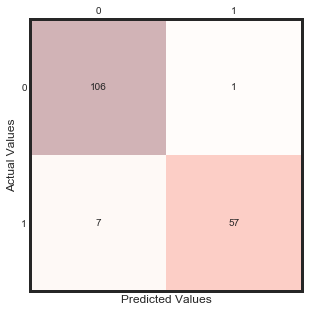

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

#### Pengamatan
Ada dua kemungkinan kelas prediksi: "1" dan "0". Ganas = 1 (menunjukkan adanya sel kanker) dan Jinak
= 0 (menunjukkan absensi).

* Pengklasifikasi membuat total 174 prediksi (yaitu 174 pasien sedang diuji keberadaan kanker payudara).
* Dari 174 kasus tersebut, pengklasifikasi memprediksi "ya" sebanyak 58 kali, dan "tidak" 113 kali.
* Pada kenyataannya, 64 pasien dalam sampel mengidap penyakit tersebut, dan 107 pasien tidak.

#### Tarif yang dihitung dari matriks konfusi
1. ** Akurasi **: Secara keseluruhan, seberapa sering pengklasifikasi benar?
    * (TP + TN) / total = (57 + 106) / 171 = 0,95

2. ** Tingkat Kesalahan Klasifikasi **: Secara keseluruhan, seberapa sering kesalahan tersebut?
    * (FP + FN) / total = (1 + 7) / 171 = 0,05 setara dengan 1 minus Akurasi juga dikenal sebagai *** "Error Rate" ***

3. ** True Positive Rate: ** Jika ya, seberapa sering prediksi 1?
   * TP / aktual ya = 57/64 = 0.89 juga dikenal sebagai "Sensitivitas" atau *** "Ingat" ***

4. ** False Positive Rate **: Jika sebenarnya 0, seberapa sering ia memprediksi 1?
   * FP / jawaban aktual = 1/107 = 0,01

5. ** Specificity **: Jika sebenarnya 0, seberapa sering ia memprediksi 0? juga dikenal sebagai ** rasio positif benar **
   * TN / no aktual = 106/107 = 0.99 setara dengan 1 dikurangi False Positive Rate

6. ** Presisi **: Ketika memprediksi 1, seberapa sering benar?
   * PB / prediksi ya = 57/58 = 0,98

7. ** Prevalensi **: Seberapa sering kondisi ya sebenarnya muncul dalam sampel kita?
   * sebenarnya ya / total = 64/171 = 0,34

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


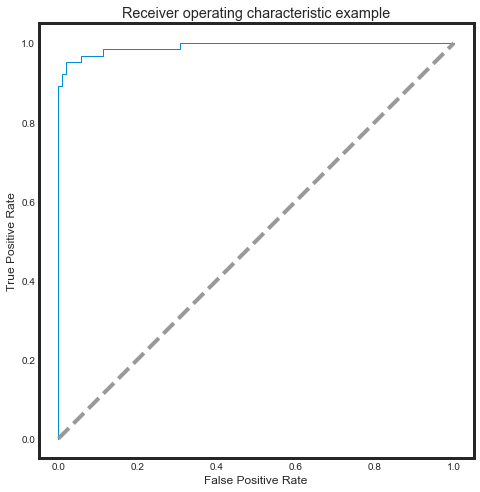

In [21]:
from sklearn.metrics import roc_curve, auc
# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(10,8))
probas_ = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.axes().set_aspect(1)

* Untuk menafsirkan KOP dengan benar, pertimbangkan apa yang diwakili oleh titik-titik yang terletak di sepanjang diagonal. Untuk situasi ini, ada peluang yang sama untuk "+" dan "-" terjadi. Oleh karena itu, ini tidak jauh berbeda dengan membuat prediksi dengan melempar koin yang tidak bias. Sederhananya, model klasifikasi itu acak.

* Untuk titik di atas diagonal, tpr> fpr, dan model mengatakan bahwa Anda berada di zona di mana Anda berkinerja lebih baik daripada acak. Misalnya, asumsikan tpr = 0.99 dan fpr = 0.01, Maka, kemungkinan berada di grup positif benar adalah $ (0.99 / (0.99 + 0.01)) = 99 \% $. Selain itu, dengan menahan konstanta fpr, mudah untuk melihat bahwa semakin vertikal posisi Anda di atas diagonal, semakin baik model klasifikasinya.